In [1]:
pip install scipy.stats

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scipy.stats (from versions: none)
ERROR: No matching distribution found for scipy.stats


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import logistic

# Lecture 4: Logistic Regression

logistic reg 의 목적, PR(y=1)일 확률(=사건이 발생할 확률)을 구하는 것

CDF 누적 확률 분포 함수 
PR(Y<=y)

logistic 분포의 CDF 함수: 
exp(y)/1+exp(y)
-> 반드시 0에서 1 사이의 값이 나옴.
-> CDF 정의 자체가 이미 확류의 개념 담고있기 때문

y자리에 그 reg 선형 함수 넣어서 계산.

왜 이렇게함? 왜 저렇게 하는게 PR(y=1):  그건 계량에서 해!

cdf 집어 넣어서 계싼하려면 beta0, beta1만 알면 됨: x가 어떤 상태일때 사건이 발생할 확률(y=1)일 확률 구할 수 있다.

데이터 이용해서 beta0와 beta1의 추정치 구함

앞에서는 그 알파, 베타 구하기 위해 OLS 사용했음.

#### Logistic regression 에서 alpha, beta, ... 추정하기 

여기서는 OLS가 아니라 MLE 사용할 것임. Maximum Likelihood Estimation 최우추정법

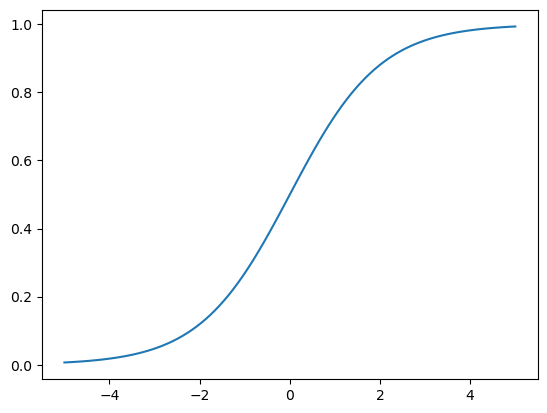

In [5]:
#logistic 분포의 CDF 그래프 그리기
x=np.linspace(-5,5,100)
y=np.exp(x)/(1+np.exp(x))
plt.plot(x,y)
plt.show() 

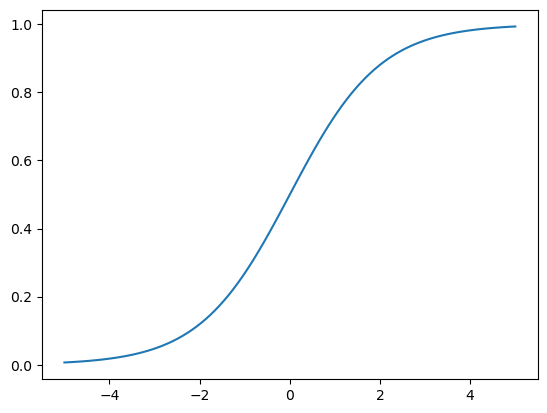

In [8]:
#Python에 이미 logistic의 cdf 함수를 내장하고 있다.
#y=logistic.cdf(x)
x=np.linspace(-5,5,100)
y=logistic.cdf(x)
plt.plot(x,y)
plt.show() 

### 2.2 승산 odds

MLE로 추정은 조금있다 하겠음

승산: 사건이 발생하지 않을 확률에 비해서 사건이 발생할 확률이 몇 배이냐?

확률의 비율로 표시
승산이 작다: 사건이 발생할 확률보다 발생하지 않을 확률이 더 크다. 
승산이 크다: 1일 확률이 매우 크다. 사건이 발생할 확률이 매우 크다.
승산의 범위: 0에서 1사이 아님. 0에서 $$infinite$$ 무한대.

승산을 이용하면 logistic dist.가 간단하게 계산됨. 

로그 승산=x변수의 선형함수

x가 한단위 증가하면 y가 1일 확률이 얼마나 변하냐: x의 한계효과,,미분으로

beta1의 부호에 따라 x의 한계효과 다름.

MLE로 beta 값 추정!

In [9]:
file1="c:/temp/credit_LN4.csv"
credit=pd.read_csv(file1)
credit

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365


In [13]:
y=credit['default']
x=credit['balance']
X=sm.add_constant(x)

#default를 Yes, no에서 숫자로 받아들이기. 더미변수로 만들기.
y=pd.get_dummies(y)
y=y['Yes']

logit_model=sm.Logit(y,X).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 04 Apr 2023   Pseudo R-squ.:                     inf
Time:                        17:18:28   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

추정계수의 의미 해석하기
coeffi 0.0055: balance가 증가할 수록 응?? 강의 듣고 추가

### Y가 1일 확률 계산하기

EX.
balance가 1000인 사람은 사건의 발생확률 얼마?

계산할때

sol1)공식 외워서 베타 추정값 넣어서 해도됨.

sol2)python에 내장된 함수 이용

In [14]:
#python에 내장된 함수 이용
X1=[1,1000]
#상수항은 1이고, balance x값은 1000일때

logit_model.predict(X1)

array([0.00575215])

In [15]:
#Pr(Y=1|balance=2000)
X2=[1,2000]
logit_model.predict(X2)

#1000에서 2000으로 늘어났는데, 돈 떼먹을 확률이 엄청 늘어났음. 심지어 0.5보다도 커짐.

array([0.58576937])

In [17]:
#식 4 해보기

#x=credit['student']
#X=sm.add_constant(x)
#y=credit['default']

#y=pd.get_dummies(y)
#y=y['Yes']
#logit_model_2=sm.Logit(y,X).fit()
#logit_model_2.summary()


## Multiple predictors Case

은행에서 이렇게 한가지 x변수로만 안할 것. 여러 변수를 사용해서 예측할 것->Multiple Predictors Case

로그 승산= x변수의 선형함수 (식5)

ML추정으로 추정

각각 coefficient의 값 의미 해석 중요! 
마이너스라면 x변수가 증가하면 y가 1일 확률이 감소

In [20]:
#student라는 변수가 문제: 얘도 Yes랑 No임. 얘도 0과 1로 바꿔야함.
stu=pd.get_dummies(credit['student'])
stu
#이 더미 변수를 credit에 stu_yes 변수 만들자
credit['stu_yes']=stu['Yes']
credit

,Unnamed: 0,default,student,balance,income,stu_yes
0,1,No,No,729.526495,44361.625074,0
1,2,No,Yes,817.180407,12106.134700,1
2,3,No,No,1073.549164,31767.138947,0
3,4,No,No,529.250605,35704.493935,0
4,5,No,No,785.655883,38463.495879,0
...,...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914,0
9996,9997,No,No,757.962918,19660.721768,0
9997,9998,No,No,845.411989,58636.156984,0
9998,9999,No,No,1569.009053,36669.112365,0


In [21]:
x=credit[['stu_yes','income','balance']]
X=sm.add_constant(x)
X

,const,stu_yes,income,balance
0,1.0,0,44361.625074,729.526495
1,1.0,1,12106.134700,817.180407
2,1.0,0,31767.138947,1073.549164
3,1.0,0,35704.493935,529.250605
4,1.0,0,38463.495879,785.655883
...,...,...,...,...
9995,1.0,0,52992.378914,711.555020
9996,1.0,0,19660.721768,757.962918
9997,1.0,0,58636.156984,845.411989
9998,1.0,0,36669.112365,1569.009053


In [22]:
y=credit['default']
x=credit[['stu_yes','income','balance']]
X=sm.add_constant(x)

#default를 Yes, no에서 숫자로 받아들이기. 더미변수로 만들기.
y=pd.get_dummies(y)
y=y['Yes']

logit_model1=sm.Logit(y,X).fit()
logit_model1.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Tue, 04 Apr 2023   Pseudo R-squ.:                     inf
Time:                        17:31:27   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
stu_yes       -0.6468      0.236     -2.738      0.006      -1.110      -0.184
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
balance        0.0057      0.000     24.737      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

###  결과 해석

-0.6468: 부호가 마이너스 : 학생이면 default할 확률이 낮아진다. 

3.033e-06: 양수 : income 증가할 수록 default할 확률이 커진다.

0.0057 : 양수 : balance 많을 수록 default할 확률 크다.

(e: 10의 마이너스 6승)

계량에서는 p value 계산함. (유의성) 

income은 통계적으로 유의하지 않다. 왜냐면 p value가 너무 크기 때문에.




-해석의 정확한 의미


계량에서는 해석할때는 '다른 조건은 일정할 때' 학생이면~~ 이렇게 해석해야함.

현실에서는 학생이더 balance가 많을 거기떄문에 학생이 더 risky 하다고 나올것

balance가 같다면! 학생이 덜 위험

boxplot 보면 알 수 있다.


#### confounding effect: 

학생만 변수로 사용하면 학생이 더 위험함.

학생과 발란스를 동시에 넣어서 추정? 학생이 덜 위험하게 나옴.

두 변수가 혼합되어있다!

분리해봤더니 오히려 학생은 덜 위험한 사람이더라.

그래서 혼합되어있을때는 balance가 많아서 위험한건지, 학생이라 위험한건지...

In [23]:
#3.4 prediction

X1=[1,1,40000,1500]
logit_model1.predict(X1)

array([0.05788194])

In [25]:
X2=[1,0,40000,1500]
logit_model1.predict(X2)

array([0.10499192])

# Multinomial Logistic Regression

지금까지 한건 binary했음. y가 0,1

multinomial logistic regression은 y가 두가지일 필요는 없음.


이렇게 세가지가 되면

이전에는 하나만 발생할 확률 알면 다른 하나는 1에서 빼면 됐는데

이제는 두가지가 발생할 확률을 알아야함. 그래야 남은건 1에서 빼서 알 수 있음.




해보진 않겠지만 당근 파이썬에서 할 수 있음.

이거 하려면 패키지 다운받아야함

pip install sklearn

그중에 LogisticRegression 이용해서 추정.


# 5   ROC curve and confusion matrix

여러가지 모형 추정해보고 그 중에 예측 잘 하는 모형 선택해서 은행에서 대출자 판단하는데 사용하자!

의 식으로 의사 결정 이루어짐. 

ROC curve: 가능한 모든 threshold에서 측정한 classificaiton rate을 그래프로 보여주는 방식

예측의 성과 파악하기 위해서는....

예측값과 진짜 y값 비교!

근데 여기서 1, 0으로 비교하는 threshold가 뭐야? 0.5 아냐? 아닐수도? 

실제 0인데 0으로 예측할 확률: specificity 특이도

특이도 클 수록 좋다.

실제 1인데, 1로 예측 할 확률 : sensitivity 민감도

특이도와 민감도 높을 수록 예측 잘한 것.


근데 특이도와 민감도는 동시에 높아질 수 없다.

민감도 높으려면 특이도는 반드시 낮아야 함.

이 특이도와 민감도를 이용해서 모든 threshold에 대한 특이도와 민감도를 찍어서 커브를 그리면 roc curve

roc curve의 모양이 중요함!

모형 별로 roc curve 나오는데, 그 모양 비교해서 뭐가더 예측 잘하는 모형인지 비교함. 

Q) 어떻게 모양이 되어야 예측을 잘하는 모형일까

곡선의 아랜쪽면적(AUC)이 클수록 예측을 잘한다!

AUC의 최댓값=1

일반적으로 AUC=0.85이면 아주 좋다고 판단한다.

In [26]:
from sklearn.metrics import roc_curve

In [27]:
from sklearn.metrics import roc_auc_score

In [28]:
from sklearn.linear_model import LogisticRegression

In [31]:
#sm과 달리 sk에서는 따로 상수 추가할 필요가 없음. 이미 포함되어있다.
x=credit[['stu_yes','income','balance']]
#y는 아까 정의한 거 쓴다.

#sk패키지 안의 logistic reg 쓰는 법
clf=LogisticRegression().fit(x,y)
clf

LogisticRegression()

In [30]:
clf.coef_

array([[-3.89009045e+00, -1.33893466e-04,  4.08201022e-03]])

In [32]:
#sm과 달리 sk에서는 따로 상수 추가할 필요가 없음. 이미 포함되어있다.
x=credit[['stu_yes','income','balance']]
X=sm.add_constant(x)
#y는 아까 정의한 거 쓴다.

#sk패키지 안의 logistic reg 쓰는 법
clf=LogisticRegression().fit(X,y)
clf

LogisticRegression()

In [33]:
clf.coef_

array([[-2.60406897e+00, -3.43293108e+00, -9.97153152e-05,
         4.79880297e-03]])

In [36]:
#roc curve, auc

pred1=clf.predict_proba(X)
pred1
#사건이 발생할 확률이 나온다
#앞 칼럼(0번째 칼럼)은 0이될 확률, 뒤 칼럼(1번째 칼럼)은 1이될 확률(Pr(yhat=1)) 한줄씩 더하면 1 <-이거 맞나?

array([[9.97829917e-01, 2.17008289e-03],
       [9.97339954e-01, 2.66004589e-03],
       [9.61729627e-01, 3.82703728e-02],
       ...,
       [9.99087213e-01, 9.12786569e-04],
       [7.91706855e-01, 2.08293145e-01],
       [9.99913768e-01, 8.62324578e-05]])

In [40]:
roc_curve(y,pred1[:,1])

#array가 3가지 나온다.
#그 세가지 값 이름 지정해보자

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.03444709e-04,
        1.03444709e-04, 2.06889418e-04, 2.06889418e-04, 3.10334126e-04,
        3.10334126e-04, 4.13778835e-04, 4.13778835e-04, 6.20668253e-04,
        6.20668253e-04, 7.24112962e-04, 7.24112962e-04, 9.31002379e-04,
        9.31002379e-04, 1.03444709e-03, 1.03444709e-03, 1.24133651e-03,
        1.24133651e-03, 1.34478121e-03, 1.34478121e-03, 1.55167063e-03,
        1.55167063e-03, 1.75856005e-03, 1.75856005e-03, 1.86200476e-03,
        1.86200476e-03, 1.96544947e-03, 1.96544947e-03, 2.06889418e-03,
        2.06889418e-03, 2.17233888e-03, 2.17233888e-03, 2.37922830e-03,
        2.37922830e-03, 2.68956243e-03, 2.68956243e-03, 2.79300714e-03,
        2.79300714e-03, 2.89645185e-03, 2.89645185e-03, 3.10334126e-03,
        3.10334126e-03, 3.31023068e-03, 3.31023068e-03, 3.41367539e-03,
        3.41367539e-03, 3.51712010e-03, 3.51712010e-03, 3.82745423e-03,
        3.82745423e-03, 3.93089893e-03, 3.93089893e-03, 4.137788

In [46]:
fpr,tpr,thresholds= roc_curve(y,pred1[:,1])
#왜 결과가 안보이지

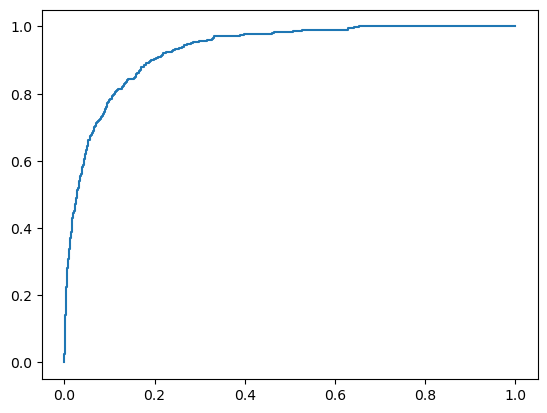

In [47]:
plt.plot(fpr, tpr)
plt.show()

In [49]:
roc_auc_score(y,pred1[:,1])

0.9296759260553613

## confusion matrix

정확하게 맞춘 비율의 합 noo/n+n11/n=ccr=특이도+민감도

In [50]:
#confusion matrix 얻는 방법
from sklearn.metrics import confusion_matrix

In [56]:
pred2=clf.predict(X)
pd.value_counts(pred2)
pred2
#predict: 확률을 계산한 다음에 0.5보다 크면 1, 0.5보다 작으면 0으로 까지로 보여줌.

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [57]:
confusion_matrix(y,pred2)

array([[9615,   52],
       [ 252,   81]], dtype=int64)

In [58]:
#전체 개수에서 대각선의 개수의 합을 분자로 하면 CCR
CCR=(9615+81)/10000
CCR
#10000개 중에 96개 정도 잘 예측했다? 이거맞나? 강의 확인!

0.9696